In [1]:
from models import Entity, Environment
import numpy as np
import torch
import torch.utils.data as Data
import matplotlib.pyplot as plt

In [2]:
x_arr = torch.linspace(-1, 1, 500)
y_arr = torch.exp(x_arr) + torch.normal(0, 0.02, size=(500,))
dataset = Data.TensorDataset(x_arr.unsqueeze(1),y_arr.unsqueeze(1))
train_loader = Data.DataLoader(
	dataset=dataset,
    batch_size=5, # Divided into batches
    shuffle=True  # Whether to disrupt the data, the default is False
)

In [3]:
x_val = torch.linspace(1, 1.2, 50)
y_val = torch.exp(x_val) + torch.normal(0, 0.02, size=(50,))
dataset = Data.TensorDataset(x_val.unsqueeze(1), y_val.unsqueeze(1))
val_loader = Data.DataLoader(
	dataset=dataset,
    batch_size=5, # Divided into batches
    shuffle=True  # Whether to disrupt the data, the default is False
)

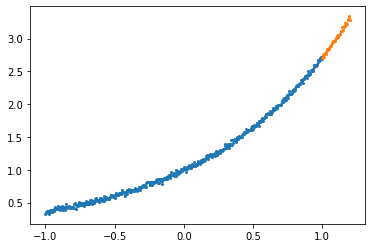

In [4]:
plt.plot(x_arr, y_arr, marker="o", lw=0, markersize=2)
plt.plot(x_val, y_val, marker="o", lw=0, markersize=2)

In [5]:
env = Environment(10, train_loader, train_epochs=20, validation_loader=val_loader)

cpu


In [6]:
env.train_epoch()

C:\Users\mrsca\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\nn\modules\container.py:141: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


In [7]:
env.validate_entities()

[0.40810119152069096,
 2.103398017883301,
 0.020550747811794282,
 0.508079776763916,
 0.40229256629943844,
 0.7152749109268188,
 0.4051454353332519,
 0.43041142940521243,
 0.6580546236038207,
 0.278956880569458]

In [8]:
m = env.entities[9]

In [9]:
y = m.predict(x_arr.unsqueeze(1))

In [10]:
l = m.loss(y, y_arr.unsqueeze(1))

In [11]:
l.item()

0.1354999542236328

In [12]:
print(m.gens)

{'layers': [{'type': 'Linear', 'in': 1, 'out': 34}, {'type': 'Linear', 'in': 34, 'out': 1}], 'criterion': 'L1Loss', 'optimizer': {'momentum': 0.12643755894378772, 'name': 'SGD', 'lr': 0.08357456396802238}}


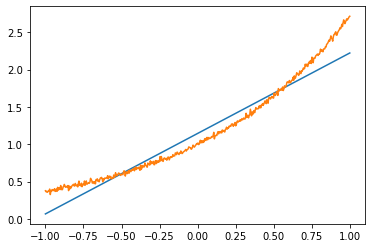

In [13]:
plt.plot(x_arr, y.squeeze(1))
plt.plot(x_arr, y_arr)

In [8]:
env.evo_step()

In [9]:
env.train_epoch()
env.validate_entities()

[0.3510309600830078,
 0.42220210313796996,
 0.02154085651040077,
 0.22963936924934386,
 0.41518909215927124,
 0.6557426261901855,
 0.4206149697303772,
 0.38101759195327756,
 0.9051909351348877,
 0.47223535537719724]

In [24]:
for i in range(10):
    env.train_epoch()
    print(env.validate_entities())
    env.evo_step()
    print(f"Evo step: {i}")

C:\Users\mrsca\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\nn\modules\container.py:141: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


[0.39865104913711547, 11.751930236816406, 0.02139860987663269, 0.24226879835128784, 0.40435405492782595, 0.7903167247772217, 0.46435814857482904, 0.4568610048294067, 0.9114351844787597, 0.5387848281860352]
Evo step: 0
[0.39397287368774414, 0.0068224182724952705, 0.11393856048583983, 0.2535048067569733, 0.3928132486343384, 0.5581278800964355, 0.408363721370697, 0.3745258641242981, 0.6914007234573364, 0.5649366235733032]
Evo step: 1
[0.43795433044433596, 0.22774463176727294, 0.04564554035663605, 0.6564402389526367, 0.37276050567626956, 0.6525152254104614, 0.43016540050506596, 0.4156553649902344, 0.6208587169647217, 0.3965466928482056]
Evo step: 2
[0.362365050315857, 3.8556066131591797, 0.10289869427680969, 0.18606284976005555, 0.3940583872795105, 0.6493680191040039, 0.46176101207733156, 0.40398069381713864, 0.5365563774108887, 0.6137826633453369]
Evo step: 3
[0.4063247585296631, 0.20066787719726564, 0.036555328518152234, 0.21509063720703123, 0.395365788936615, 0.6835181760787964, 0.45131

C:\Users\mrsca\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\nn\modules\container.py:141: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


{'layers': [{'type': 'Linear', 'in': 1, 'out': 10}, {'type': 'Softmax', 'in': 10, 'out': 10}, {'type': 'ReLU', 'in': 10, 'out': 10}, {'type': 'Linear', 'in': 10, 'out': 29}, {'type': 'Linear', 'in': 29, 'out': 41}, {'type': 'Tanh', 'in': 41, 'out': 39}, {'type': 'Tanh', 'in': 39, 'out': 47}, {'type': 'Sigmoid', 'in': 47, 'out': 34}, {'type': 'Linear', 'in': 34, 'out': 1}], 'criterion': 'L1Loss', 'optimizer': {'name': 'Adam', 'lr': 0.29219234621805107}}


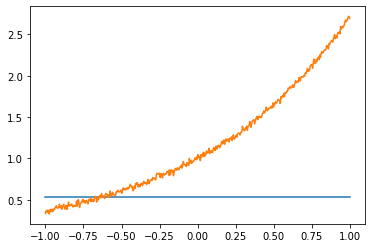

In [23]:
m = env.entities[9]
m.train(train_loader, 50)
print(m.gens)
y = m.predict(x_arr.unsqueeze(1))
plt.plot(x_arr, y.squeeze(1))
plt.plot(x_arr, y_arr)

C:\Users\mrsca\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\nn\modules\container.py:141: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)
C:\Users\mrsca\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\nn\modules\container.py:141: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)
C:\Users\mrsca\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\nn\modules\container.py:141: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)
C:\Users\mrsca\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\nn\modules\container.py:141: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = mo

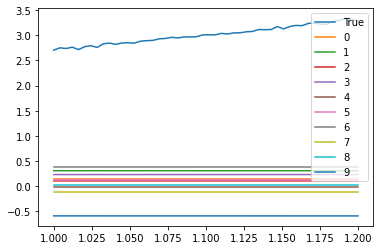

In [27]:
plt.plot(x_val, y_val, label="True")
for i, ent in enumerate(env.entities):
    y = ent.predict(x_val.unsqueeze(1))
    plt.plot(x_val, y.squeeze(1), label=str(i))
plt.legend()
plt.show()